In [72]:
# Programming

import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Statistics
import statsmodels.stats.api as sms
from statsmodels.stats.proportion import proportions_ztest, proportion_confint


In [73]:
df = pd.read_csv("ab_test_dataset.csv")

In [74]:
df.head()

,CustomerID,Date,Treatment_Group,Conversions,Purchase_amount
0,1,2022-06-25,Control,0,NaN
1,2,2022-01-28,Target,0,NaN
2,3,2022-08-06,Control,0,NaN
3,4,2022-11-23,Target,0,NaN
4,5,2022-03-08,Control,0,NaN


In [75]:
# Count number of control group conversions

control = df[(df.Treatment_Group == 'Control')]
control_converted = control[(df.Conversions == 1)]
control_converted

C:\Users\User\AppData\Local\Temp\ipykernel_6220\1079814646.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  control_converted = control[(df.Conversions == 1)]


,CustomerID,Date,Treatment_Group,Conversions,Purchase_amount
21,22,2022-04-17,Control,1,59.457390
42,43,2022-09-27,Control,1,67.827201
51,52,2022-07-07,Control,1,11.565641
66,67,2022-02-16,Control,1,91.230881
92,93,2022-03-12,Control,1,117.769564
...,...,...,...,...,...
839341,839342,2022-06-01,Control,1,91.129252
839431,839432,2022-04-15,Control,1,17.148395
839441,839442,2022-01-05,Control,1,130.487317
839449,839450,2022-08-15,Control,1,34.896074


In [76]:
# Count number of Target group conversions

target = df[(df.Treatment_Group == 'Target')]
target_converted = target[(df.Conversions == 1)]
target_converted

C:\Users\User\AppData\Local\Temp\ipykernel_6220\1184839783.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_converted = target[(df.Conversions == 1)]


,CustomerID,Date,Treatment_Group,Conversions,Purchase_amount
5,6,2022-02-20,Target,1,132.562912
48,49,2022-12-27,Target,1,119.537543
73,74,2022-08-06,Target,1,47.251650
103,104,2022-07-21,Target,1,136.659938
113,114,2022-07-19,Target,1,8.450868
...,...,...,...,...,...
839411,839412,2022-09-03,Target,1,25.075023
839418,839419,2022-04-03,Target,1,133.692845
839458,839459,2022-08-20,Target,1,69.570890
839492,839493,2022-11-26,Target,1,53.139516


In [77]:
df = df[(df.Conversions == 1)]

In [78]:
# number of rows
df.shape[0]

83660

In [79]:
# Control conversion rate

control_conversion_rate = control_converted.sum()['Conversions'] / df.shape[0]
control_conversion_rate

0.497585464977289

In [80]:
# Treatment group conversion counts

treatment_counts = df.groupby('Treatment_Group').sum()['Conversions']
treatment_counts

Treatment_Group
Control    41628
Target     42032
Name: Conversions, dtype: int64

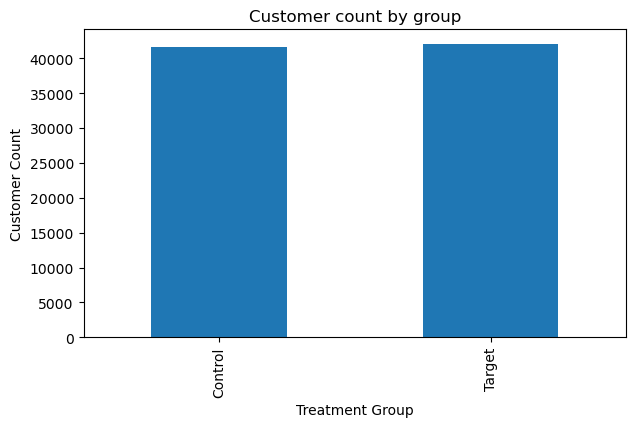

In [81]:
treatment_counts.plot(kind = 'bar', figsize=(7,4))
plt.title('Customer count by group')
plt.ylabel('Customer Count')
plt.xlabel('Treatment Group')
plt.show()

In [82]:
conversion_rates = treatment_counts / df.shape[0]
conversion_rates = conversion_rates.round(3)
conversion_rates

Treatment_Group
Control    0.498
Target     0.502
Name: Conversions, dtype: float64

In [83]:
# average purchase amount per customer

avg_purchase = df.groupby('Treatment_Group').mean()['Purchase_amount']
avg_purchase

Treatment_Group
Control    75.169045
Target     75.396693
Name: Purchase_amount, dtype: float64

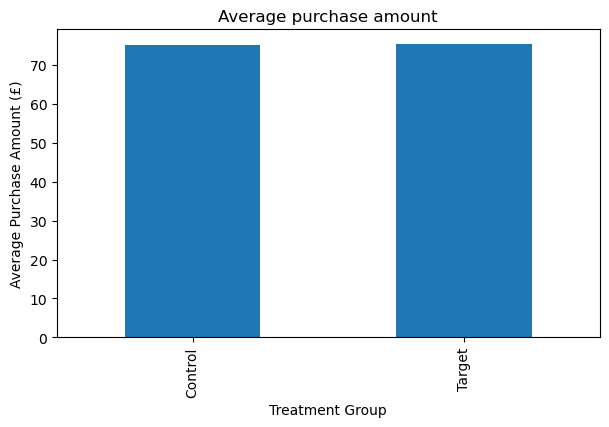

In [84]:
# Plot of average purchase amount

avg_purchase.plot(kind = 'bar', figsize = (7,4))

plt.title('Average purchase amount')
plt.ylabel('Average Purchase Amount (£)')
plt.xlabel('Treatment Group')
plt.show()

In [85]:
# compute the difference we want to obtain 

effect_size = sms.proportion_effectsize(0.49, 0.55)


In [86]:
# Computing the needed sample size (per group) to ensure that we capture significatn differences
    # Effect size = The difference you want to observe
    # Power = The probability that we will capture an existing difference. 0.08 is standard practice
    # Alpha = alpha value for you desired statistical significance

required_n = np.ceil(sms.NormalIndPower().solve_power(effect_size, power = 0.8, alpha=0.05, ratio=1))

In [87]:
# Print required sample

print(f'Number of observations needed by group: {int(required_n)}')
print(f'Number of total observations on dataset: {df.shape[0]}')
print('')

Number of observations needed by group: 1088
Number of total observations on dataset: 83660



In [88]:
# Counting successes on each group
conversions_count = [control.Conversions.sum(), target.Conversions.sum()]

# Counting observations on each group
obs_count = [control.Conversions.count(), target.Conversions.count()]

# Computing p-value of the ad_success distribution
z_stat, pval = proportions_ztest(conversions_count, nobs=obs_count)

# Computing 95% confidence intervals
(l_ci_con, l_ci_exp), (u_ci_con, u_ci_exp) = proportion_confint(conversions_count, nobs=obs_count, alpha=0.05)


In [90]:
print('The p_value of conversion is {}'.format(pval.round(4)))
print(f'The 95% CI for conversion on the control group is [{l_ci_con.round(4)}, {u_ci_con.round(4)}]')
print(f'The 95% CI for conversion on the target group is [{l_ci_exp.round(4)}, {u_ci_exp.round(4)}]')

The p_value of conversion is 0.17
The 95% CI for conversion on the control group is [0.0983, 0.1001]
The 95% CI for conversion on the target group is [0.0992, 0.101]
